# Information Metrics

Run information theory metrics on time series signals.

Entropy measures explored here:
- sample entropy: XX
- permutation entropy: XX
- approximate entropy: XX
- spectral entropy: the Shannon entropy of the PSD

Notes:
- sample & approximate entroy are pretty similar, maybe don't need both (?)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import sample_entropy, perm_entropy, app_entropy, spectral_entropy

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Custom settings
N_SIMS = 10

In [4]:
# Settings for entropy measures
sa_params = {'order' : 2}                  # Sample Entropy
pe_params = {'order' : 3, 'delay' : 1}     # Permutation Entropy
ap_params = {'order' : 2}                  # Approximate Entropy
sp_params = {'sf' : FS, 'method' : 'fft'}  # Spectral Entropy

In [5]:
# Set the random seed
set_random_seed(111)

In [6]:
# Notebook Settings
SAVE_FIG = False

## Calculating Entropy Measures on Example Signals

In [7]:
print('Computed sample entropy:')
print('  powerlaw: \t {:1.4f}'.format(sample_entropy(SIG_AP, **sa_params)))
print('  osc:      \t {:1.4f}'.format(sample_entropy(SIG_OSC, **sa_params)))
print('  combined: \t {:1.4f}'.format(sample_entropy(SIG_COMB, **sa_params)))
print('  knee:     \t {:1.4f}'.format(sample_entropy(SIG_KN, **sa_params)))

Computed sample entropy:
  powerlaw: 	 0.0374
  osc:      	 0.1629
  combined: 	 0.1020
  knee:     	 1.3571


In [8]:
print('Computed permutation entropy:')
print('  powerlaw: \t {:1.4f}'.format(perm_entropy(SIG_AP, **pe_params)))
print('  osc:      \t {:1.4f}'.format(perm_entropy(SIG_OSC, **pe_params)))
print('  combined: \t {:1.4f}'.format(perm_entropy(SIG_COMB, **pe_params)))
print('  knee:     \t {:1.4f}'.format(perm_entropy(SIG_KN, **pe_params)))

Computed permutation entropy:
  powerlaw: 	 2.4437
  osc:      	 1.1414
  combined: 	 1.7102
  knee:     	 2.5110


In [9]:
print('Computed approximate entropy:')
print('  powerlaw: \t {:1.4f}'.format(app_entropy(SIG_AP, **ap_params)))
print('  osc:      \t {:1.4f}'.format(app_entropy(SIG_OSC, **ap_params)))
print('  combined: \t {:1.4f}'.format(app_entropy(SIG_COMB, **ap_params)))
print('  knee:     \t {:1.4f}'.format(app_entropy(SIG_KN, **ap_params)))

Computed approximate entropy:
  powerlaw: 	 0.0382
  osc:      	 0.2010
  combined: 	 0.1019
  knee:     	 1.4789


In [10]:
print('Computed spectral entropy:')
print('  powerlaw: \t {:1.4f}'.format(spectral_entropy(SIG_AP, **sp_params)))
print('  osc:      \t {:1.4f}'.format(spectral_entropy(SIG_OSC, **sp_params)))
print('  combined: \t {:1.4f}'.format(spectral_entropy(SIG_COMB, **sp_params)))
print('  knee:     \t {:1.4f}'.format(spectral_entropy(SIG_KN, **sp_params)))

Computed spectral entropy:
  powerlaw: 	 1.9138
  osc:      	 0.0000
  combined: 	 1.9696
  knee:     	 10.8074


## Entropy Simulations: Aperiodic Variations

Calculate entropy measures on simulated powerlaw signals, with and without oscillations. 

### Sample Entropy

In [11]:
# Run simulations calculating sample entropy across exponents
sa_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, sample_entropy, sa_params,
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

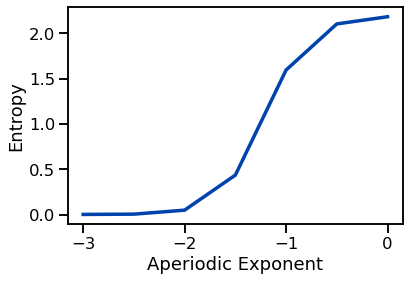

In [12]:
# Plot sample entropy measures across exponent values
plot_lines(EXPS, sa_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_exp', file_path='info')

In [13]:
# Run simulations calculating sample entropy across exponents, with an oscillation
sa_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, sa_params,
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

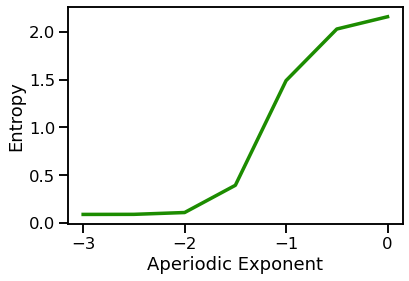

In [14]:
# Plot sample entropy measures across exponent values
plot_lines(EXPS, sa_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_comb', file_path='info')

#### Plot Aperiodic & Combined Together

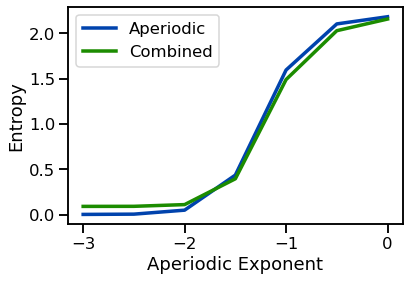

In [15]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, sa_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, sa_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_both', file_path='info')

### Permutation Entropy

In [16]:
# Run simulations calculating permutation entropy across exponents
pe_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, perm_entropy, pe_params,
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

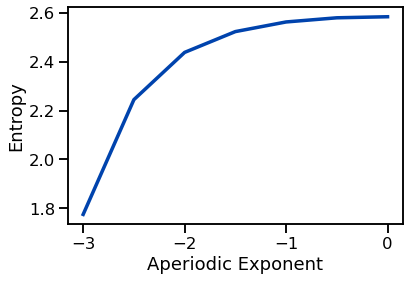

In [17]:
# Plot permutation entropy measures across exponent values
plot_lines(EXPS, pe_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_exp', file_path='info')

In [18]:
# Run simulations calculating permutation entropy across exponents, with an oscillation
pe_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, pe_params,
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

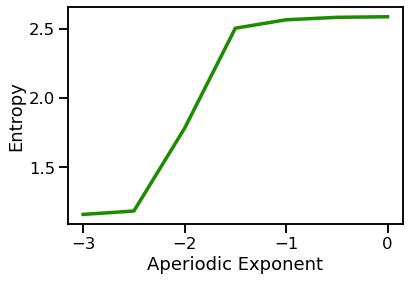

In [19]:
# Plot permutation entropy measures across exponent values, with an oscillation
plot_lines(EXPS, pe_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_comb', file_path='info')

#### Plot Aperiodic & Combined Together

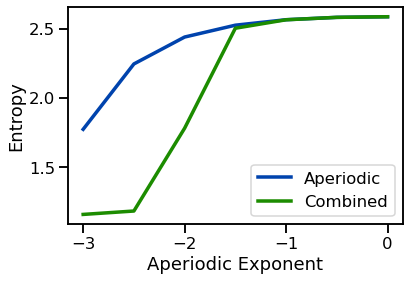

In [20]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, pe_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, pe_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_both', file_path='info')

### Approximate Entropy

In [21]:
# Run simulations calculating approximate entropy across exponents
ap_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, app_entropy, ap_params, 
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

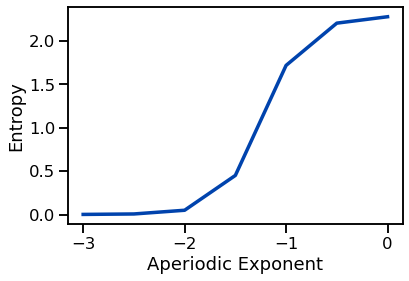

In [22]:
# Plot approximate entropy measures across exponent values
plot_lines(EXPS, ap_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_exp', file_path='info')

In [23]:
# Run simulations calculating approximate entropy across exponents, with an oscillation
ap_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, ap_params, 
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

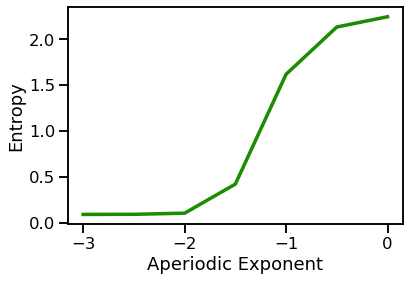

In [24]:
# Plot approximate entropy measures across exponent values, with an oscillation
plot_lines(EXPS, ap_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_comb', file_path='info')

#### Plot Aperiodic & Combined Together

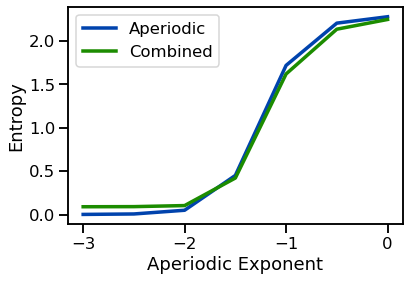

In [25]:
# Plot entropy measures for with & without oscillation together
plot_lines(EXPS, ap_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, ap_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

### Spectral Entropy

In [26]:
# Run simulations calculating spectral entropy across exponents
sp_ents = run_sims(sim_powerlaw, SIM_PARAMS_AP, spectral_entropy, sp_params, 
                   update='update_exp', values=EXPS, n_sims=N_SIMS)

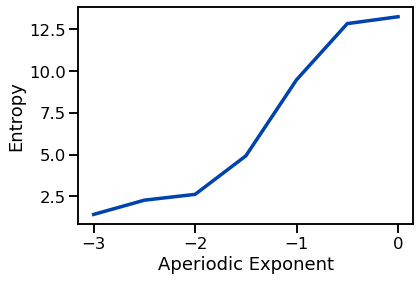

In [27]:
# Plot spectral entropy measures across exponent values
plot_lines(EXPS, sp_ents, color=AP_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_exp', file_path='info')

In [28]:
# Run simulations calculating spectral entropy across exponents, with an oscillation
sp_ents_comb = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, sp_params, 
                        update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

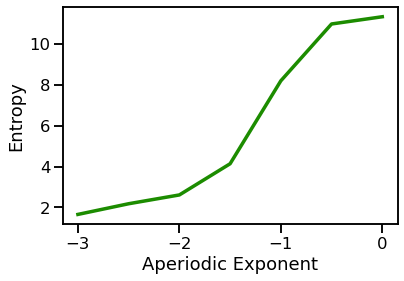

In [29]:
# Plot spectral entropy measures across exponent values, with an oscillation
plot_lines(EXPS, sp_ents_comb, color=COMB_COL)
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_comb', file_path='info')

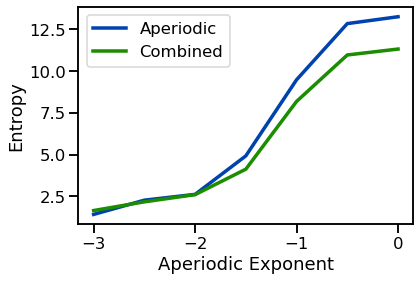

In [30]:
# Plot spectral entropy measures for with & without oscillation together
plot_lines(EXPS, sp_ents, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, sp_ents_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_both', file_path='info')

## Entropy Simulations - Periodic Variations

Calculate entropy measures on simulated combined signals, with an oscillation and powerlaw components, across variations of oscillatory parameters. 

#### Sample Entropy

In [31]:
# Run simulations calculating sample entropy across oscillation frequency
sa_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, sa_params,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

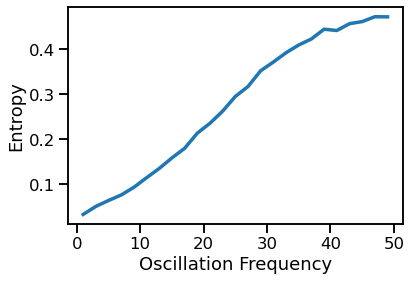

In [32]:
# Plot sample entropy measures across oscillation frequency values
plot_lines(FREQS, sa_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_osc_freq', file_path='info')

In [33]:
# Run a set of simulations, calculating sample entropy across oscillation power
sa_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, sample_entropy, sa_params,
                       update='update_pow', values=POWS, n_sims=N_SIMS)

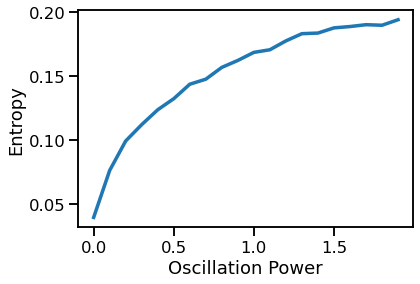

In [34]:
# Plot sample entropy measures across oscillation power values
plot_lines(POWS, sa_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='se_osc_pow', file_path='info')

#### Permutation Entropy

In [35]:
# Run a set of simulations, calculating permutation entropy across oscillation frequency
pe_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, pe_params,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

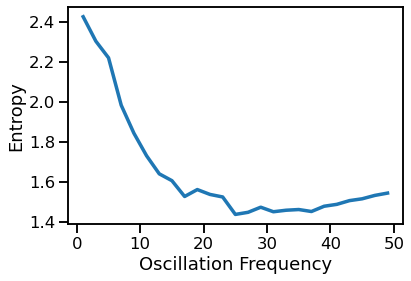

In [36]:
# Plot permutation entropy measures across oscillation frequency values
plot_lines(FREQS, pe_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_osc_freq', file_path='info')

In [37]:
# Run simulations calculating permutation entropy across oscillation power
pe_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, perm_entropy, pe_params,
                       update='update_pow', values=POWS, n_sims=N_SIMS)

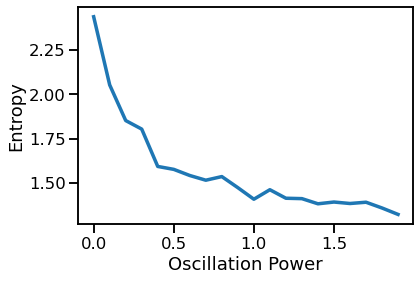

In [38]:
# Plot permutation entropy measures across oscillation power values
plot_lines(POWS, pe_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='pe_osc_pow', file_path='info')

#### Approximate Entropy

In [39]:
# Run simulations calculating approximate entropy across oscillation frequency
ap_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, ap_params,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

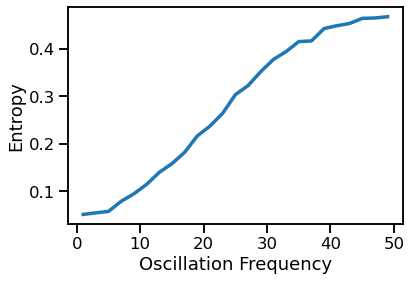

In [40]:
# Plot approximate entropy measures across oscillation frequency values
plot_lines(FREQS, ap_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_freq', file_path='info')

In [41]:
# Run simulations calculating approximate entropy across oscillation power
ap_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, app_entropy, ap_params,
                       update='update_pow', values=POWS, n_sims=N_SIMS)

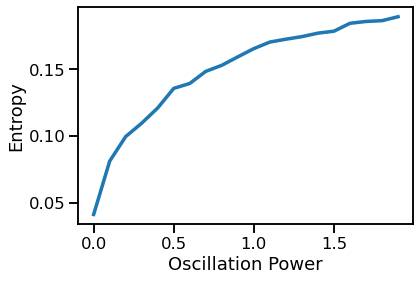

In [42]:
# Plot approximate entropy measures across oscillation power values
plot_lines(POWS, ap_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_power', file_path='info')

#### Spectral Entropy

In [43]:
# Run simulations calculating spectral entropy across oscillation frequency
sp_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, sp_params,
                        update='update_freq', values=FREQS, n_sims=N_SIMS)

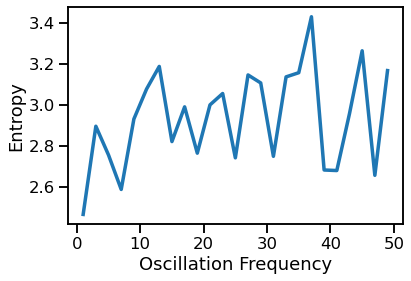

In [44]:
# Plot spectral entropy measures across oscillation frequency values
plot_lines(FREQS, sp_sims_freq)
plot_lines(xlabel='Oscillation Frequency', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_freq', file_path='info')

In [45]:
# Run simulations calculating spectral entropy across oscillation power
sp_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, spectral_entropy, sp_params,
                       update='update_pow', values=POWS, n_sims=N_SIMS)

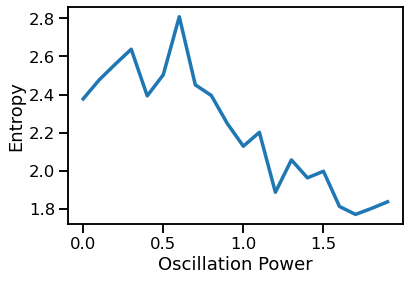

In [46]:
# Plot spectral entropy measures across oscillation power values
plot_lines(POWS, sp_sims_pow)
plot_lines(xlabel='Oscillation Power', ylabel='Entropy')
plot_lines(save_fig=SAVE_FIG, file_name='ap_osc_power', file_path='info')